In [1]:
import pandas as pd
import seaborn as sns

In [5]:
dados = pd.read_csv('tips.csv')
dados.sample(5)

,total_bill,tip,dessert,day,time,size
20,17.92,4.08,No,Sat,Dinner,2
89,21.16,3.00,No,Thur,Lunch,2
232,11.61,3.39,No,Sat,Dinner,2
197,43.11,5.00,Yes,Thur,Lunch,4
142,41.19,5.00,No,Thur,Lunch,5


#Tradução

In [6]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [7]:
renomear = {'total_bill' : 'valor_conta', 
            'tip' : 'gorjeta', 
            'dessert' : 'sobremesa', 
            'day' : 'dia',
            'time' : 'hora',
            'size' : 'total_pessoas'}

In [8]:
gorjetas = dados.rename(columns = renomear)

In [9]:
gorjetas.sample(5)

,valor_conta,gorjeta,sobremesa,dia,hora,total_pessoas
192,28.44,2.56,Yes,Thur,Lunch,2
27,12.69,2.00,No,Sat,Dinner,2
185,20.69,5.00,No,Sun,Dinner,5
118,12.43,1.80,No,Thur,Lunch,2
50,12.54,2.50,No,Sun,Dinner,2


In [10]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [11]:
sim_nao = {'No' : 'não', 'Yes' : 'sim'}

In [14]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [15]:
gorjetas.head()

,valor_conta,gorjeta,sobremesa,dia,hora,total_pessoas
0,16.99,1.01,não,Sun,Dinner,2
1,10.34,1.66,não,Sun,Dinner,3
2,21.01,3.50,não,Sun,Dinner,3
3,23.68,3.31,não,Sun,Dinner,2
4,24.59,3.61,não,Sun,Dinner,4


In [17]:
gorjetas.dia.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [18]:
dias = {
    'Sun' : 'domingo',
    'Sat' : 'sabado',
    'Thur' : 'quinta', 
    'Fri' : 'sexta'
}

In [19]:
gorjetas.dia = gorjetas.dia.map(dias)

In [20]:
gorjetas.sample(5)

,valor_conta,gorjeta,sobremesa,dia,hora,total_pessoas
217,11.59,1.50,sim,sabado,Dinner,2
41,17.46,2.54,não,domingo,Dinner,2
92,5.75,1.00,sim,sexta,Dinner,2
94,22.75,3.25,não,sexta,Dinner,2
22,15.77,2.23,não,sabado,Dinner,2


In [21]:
gorjetas.hora.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [22]:
hora_dia = {
    'Dinner' : 'jantar', 
    'Lunch' : 'almoço'
}

In [23]:
gorjetas.hora = gorjetas.hora.map(hora_dia)

In [24]:
gorjetas.sample(5)

,valor_conta,gorjeta,sobremesa,dia,hora,total_pessoas
161,12.66,2.50,não,domingo,jantar,2
158,13.39,2.61,não,domingo,jantar,2
173,31.85,3.18,sim,domingo,jantar,2
78,22.76,3.00,não,quinta,almoço,2
167,31.71,4.50,não,domingo,jantar,4


#Seaborn

In [26]:
!pip show seaborn

Name: seaborn
Version: 0.11.1
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: /usr/local/lib/python3.7/dist-packages
Requires: pandas, matplotlib, scipy, numpy
Required-by: missingno


In [28]:
gorjetas.columns

Index(['valor_conta', 'gorjeta', 'sobremesa', 'dia', 'hora', 'total_pessoas'], dtype='object')

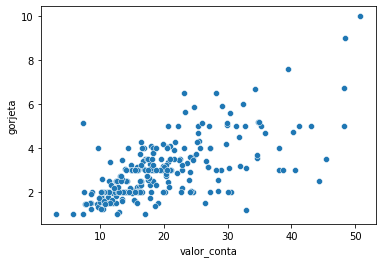

In [30]:
scatter_gorjeta = sns.scatterplot(x = 'valor_conta', y = 'gorjeta', data = gorjetas)

In [31]:
print(f"A base de dados contem {gorjetas.shape[0]} registros")

A base de dados contem 244 registros


In [33]:
print(f"{gorjetas.count()}")

valor_conta      244
gorjeta          244
sobremesa        244
dia              244
hora             244
total_pessoas    244
dtype: int64


#Criando o campo porcentagem

In [34]:
gorjetas.head(5)

,valor_conta,gorjeta,sobremesa,dia,hora,total_pessoas
0,16.99,1.01,não,domingo,jantar,2
1,10.34,1.66,não,domingo,jantar,3
2,21.01,3.50,não,domingo,jantar,3
3,23.68,3.31,não,domingo,jantar,2
4,24.59,3.61,não,domingo,jantar,4


In [36]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_conta']

In [37]:
gorjetas.sample(5)

,valor_conta,gorjeta,sobremesa,dia,hora,total_pessoas,porcentagem
156,48.17,5.00,não,domingo,jantar,6,0.103799
71,17.07,3.00,não,sabado,jantar,3,0.175747
193,15.48,2.02,sim,quinta,almoço,2,0.130491
103,22.42,3.48,sim,sabado,jantar,2,0.155219
3,23.68,3.31,não,domingo,jantar,2,0.139780


In [38]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

In [39]:
gorjetas.sample(5)

,valor_conta,gorjeta,sobremesa,dia,hora,total_pessoas,porcentagem
6,8.77,2.00,não,domingo,jantar,2,0.23
232,11.61,3.39,não,sabado,jantar,2,0.29
39,31.27,5.00,não,sabado,jantar,3,0.16
53,9.94,1.56,não,domingo,jantar,2,0.16
27,12.69,2.00,não,sabado,jantar,2,0.16


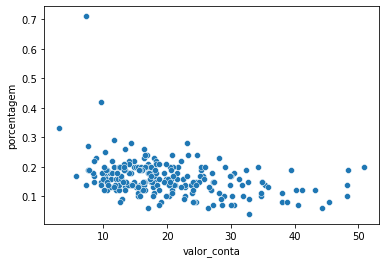

In [45]:
porcentagem_plot = sns.scatterplot(x = 'valor_conta', y = 'porcentagem', data = gorjetas)

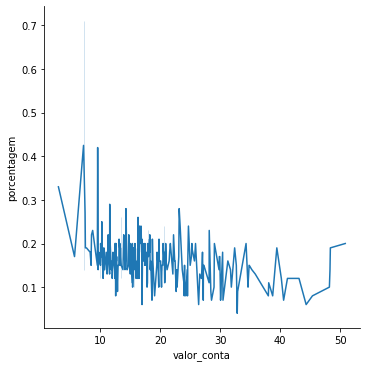

In [49]:
porcentagem_conta_linha = sns.relplot(x = 'valor_conta', y = 'porcentagem', kind = 'line', data = gorjetas)

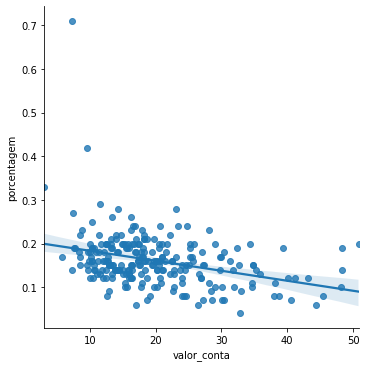

In [50]:
sns.lmplot(x = 'valor_conta', y = 'porcentagem', data = gorjetas)

#Análise 2 - Sobremesa

In [53]:
gorjetas[gorjetas.sobremesa == 'sim'].describe()

,valor_conta,gorjeta,total_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [54]:
gorjetas[gorjetas.sobremesa == 'não'].describe()

,valor_conta,gorjeta,total_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


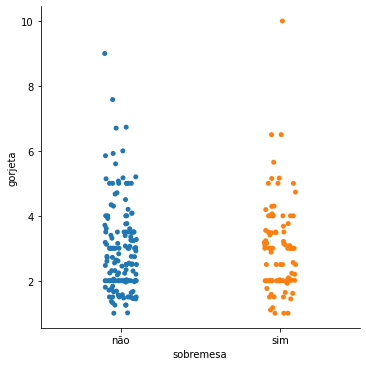

In [56]:
sns.catplot(x = 'sobremesa', y = 'gorjeta', data = gorjetas)

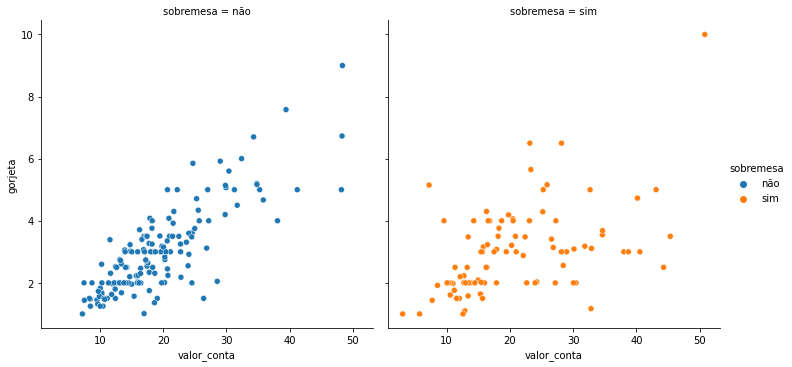

In [58]:
sns.relplot(x = 'valor_conta', y ='gorjeta', hue = 'sobremesa', col = 'sobremesa', data = gorjetas)

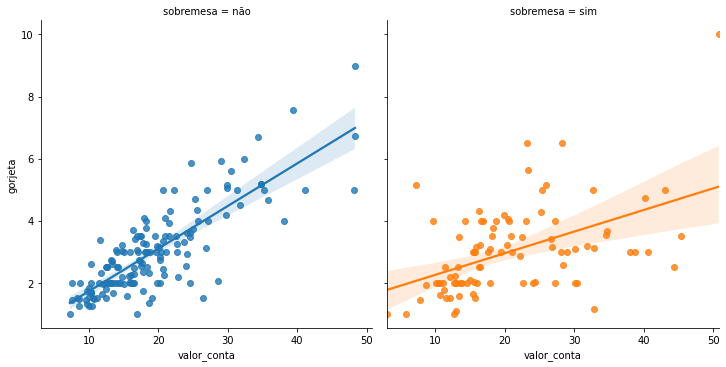

In [59]:
sns.lmplot(x= 'valor_conta', y = 'gorjeta', col = 'sobremesa', hue = 'sobremesa', data = gorjetas)

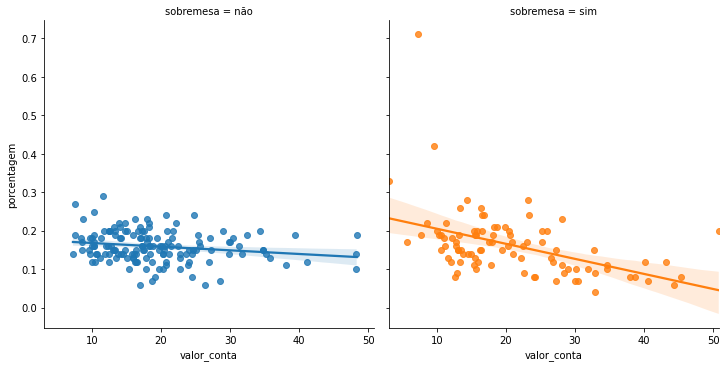

In [60]:
sns.lmplot(x = 'valor_conta', y = 'porcentagem', col = 'sobremesa', hue = 'sobremesa', data = gorjetas)

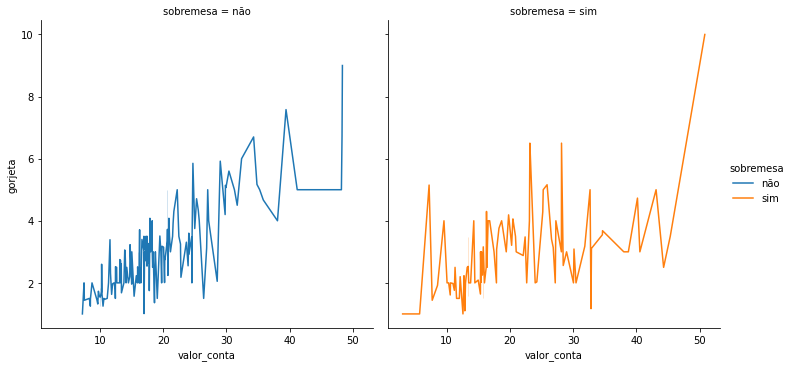

In [61]:
sns.relplot(x = 'valor_conta', y ='gorjeta', hue = 'sobremesa', col = 'sobremesa', kind = 'line', data = gorjetas)

#Teste de Hipótese

In [64]:
from scipy.stats import ranksums

In [66]:
sobremesa = gorjetas.query("sobremesa == 'sim'").porcentagem

In [70]:
sem_sobremesa = gorjetas.query("sobremesa == 'não'"). porcentagem

In [72]:
r = ranksums(sobremesa, sem_sobremesa)

In [73]:
print(f"O valor do p-value é {r.pvalue}")

O valor do p-value é 0.5266635660124415


In [74]:
gorjetas.dia

0      domingo
1      domingo
2      domingo
3      domingo
4      domingo
        ...   
239     sabado
240     sabado
241     sabado
242     sabado
243     quinta
Name: dia, Length: 244, dtype: object

In [75]:
gorjetas.dia.unique()

array(['domingo', 'sabado', 'quinta', 'sexta'], dtype=object)

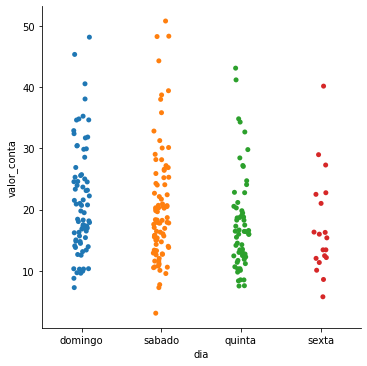

In [76]:
sns.catplot(x = 'dia', y = 'valor_conta', data = gorjetas)

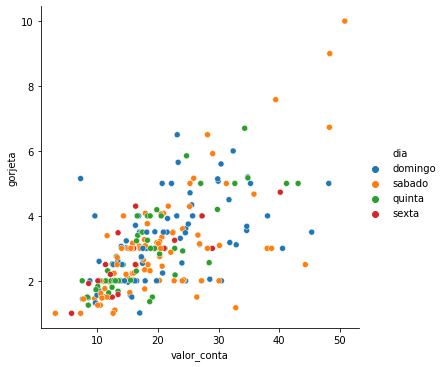

In [77]:
sns.relplot(x = 'valor_conta', y = 'gorjeta', hue = 'dia', data = gorjetas)

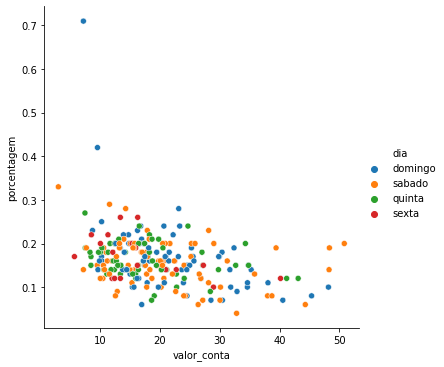

In [78]:
sns.relplot(x = 'valor_conta', y = 'porcentagem', hue = 'dia', data = gorjetas)

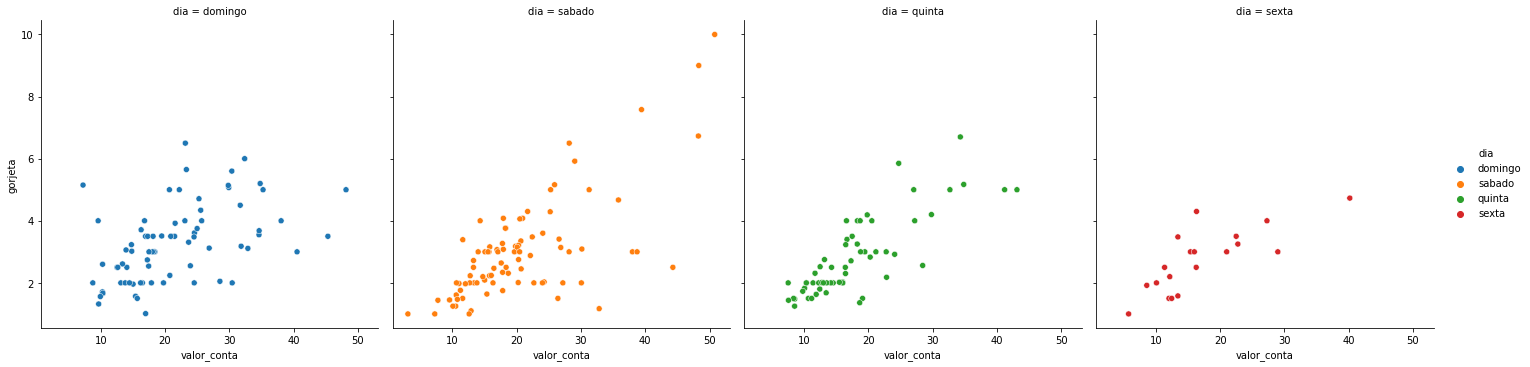

In [79]:
sns.relplot(x = 'valor_conta', y = 'gorjeta', hue = 'dia', col = 'dia', data = gorjetas)

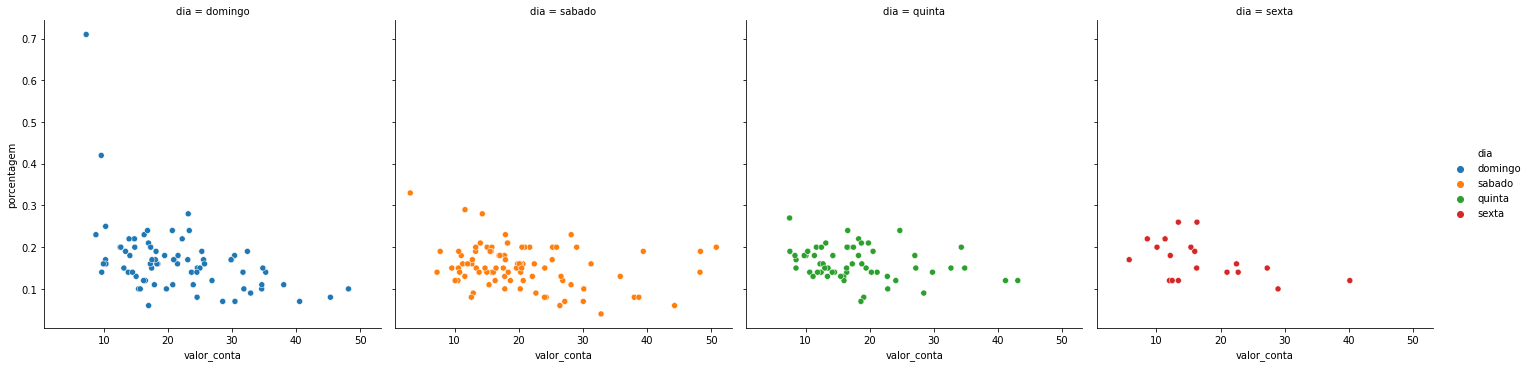

In [80]:
sns.relplot(x = 'valor_conta', y = 'porcentagem', hue = 'dia', col = 'dia', data = gorjetas)

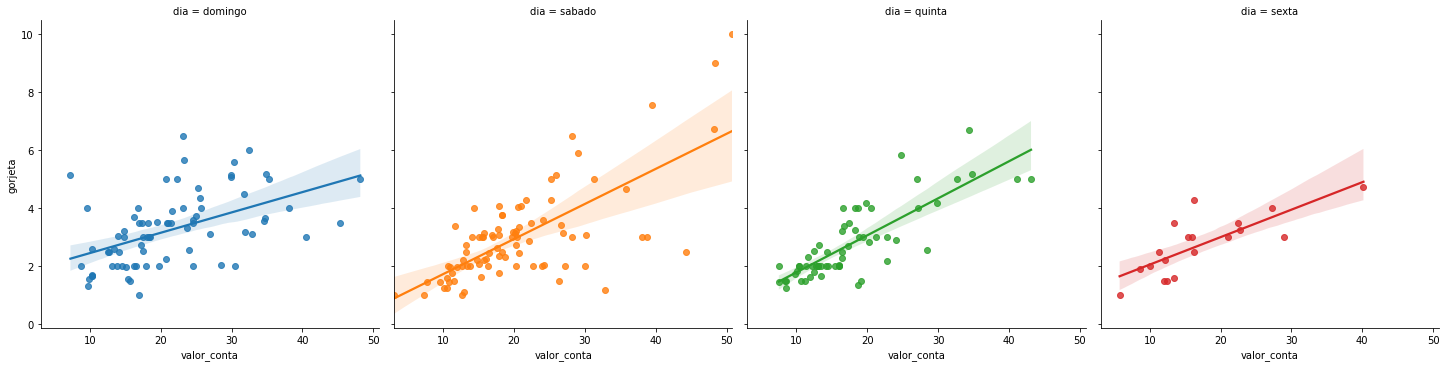

In [82]:
sns.lmplot(x = 'valor_conta', y = 'gorjeta', hue = 'dia', col = 'dia', data = gorjetas)

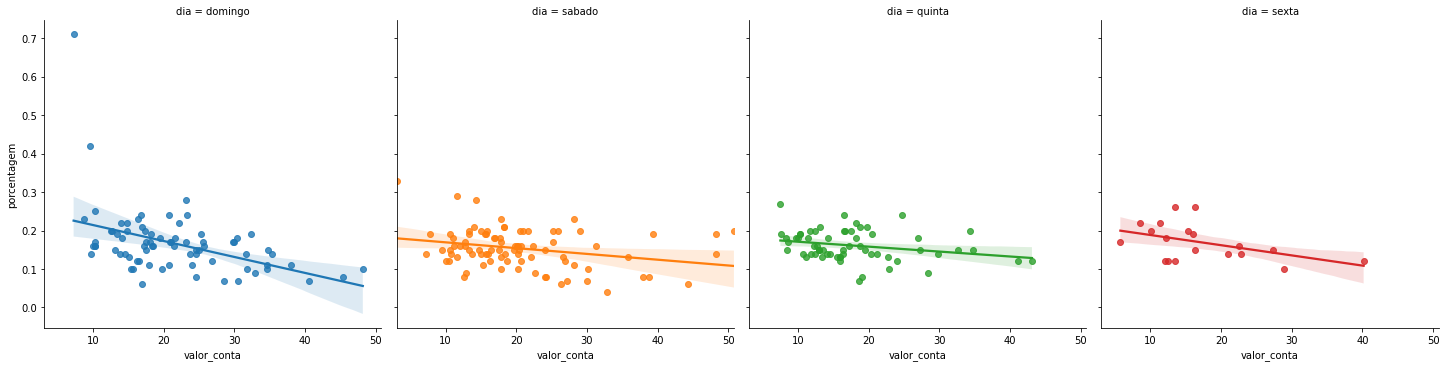

In [83]:
sns.lmplot(x = 'valor_conta', y = 'porcentagem', hue = 'dia', col = 'dia', data = gorjetas)

#Análise Descritiva

In [85]:
media_geral_gorjetas = gorjetas.gorjeta.mean()

In [86]:
print(f"A média geral das gorjetas é de {media_geral_gorjetas}")

A média geral das gorjetas é de 2.9982786885245902


In [88]:
gorjetas.groupby(['dia']).mean()[['valor_conta', 'gorjeta', 'porcentagem']]

,valor_conta,gorjeta,porcentagem
dia,,,
domingo,21.410000,3.255132,0.166974
quinta,17.682742,2.771452,0.161129
sabado,20.441379,2.993103,0.153678
sexta,17.151579,2.734737,0.169474


In [90]:
print(f"Frequência dos dias")
gorjetas.dia.value_counts()

Frequência dos dias


sabado     87
domingo    76
quinta     62
sexta      19
Name: dia, dtype: int64

#Teste de Hipótese

In [92]:
valor_conta_domingo = gorjetas.query("dia == 'domingo'").valor_conta

In [93]:
valor_conta_sabado = gorjetas.query("dia == 'sabado'").valor_conta

In [95]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)

In [96]:
print(f"Pvalue = {r2}")

Pvalue = RanksumsResult(statistic=0.9198084864360142, pvalue=0.3576728477868443)


In [98]:
gorjetas

,valor_conta,gorjeta,sobremesa,dia,hora,total_pessoas,porcentagem
0,16.99,1.01,não,domingo,jantar,2,0.06
1,10.34,1.66,não,domingo,jantar,3,0.16
2,21.01,3.50,não,domingo,jantar,3,0.17
3,23.68,3.31,não,domingo,jantar,2,0.14
4,24.59,3.61,não,domingo,jantar,4,0.15
...,...,...,...,...,...,...,...
239,29.03,5.92,não,sabado,jantar,3,0.20
240,27.18,2.00,sim,sabado,jantar,2,0.07
241,22.67,2.00,sim,sabado,jantar,2,0.09
242,17.82,1.75,não,sabado,jantar,2,0.10


In [99]:
gorjetas.hora

0      jantar
1      jantar
2      jantar
3      jantar
4      jantar
        ...  
239    jantar
240    jantar
241    jantar
242    jantar
243    jantar
Name: hora, Length: 244, dtype: object

# Hora do dia

In [100]:
gorjetas.hora.unique()

array(['jantar', 'almoço'], dtype=object)

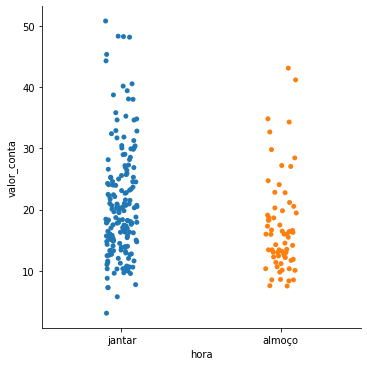

In [101]:
sns.catplot(x = 'hora', y = 'valor_conta', data = gorjetas)

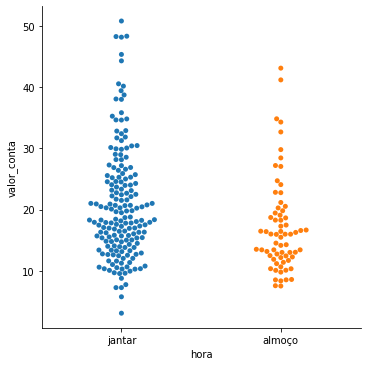

In [103]:
sns.catplot(x = 'hora', y = 'valor_conta', kind = 'swarm', data = gorjetas)

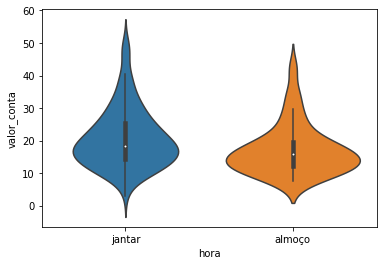

In [104]:
sns.violinplot(x = 'hora', y = 'valor_conta', data = gorjetas)

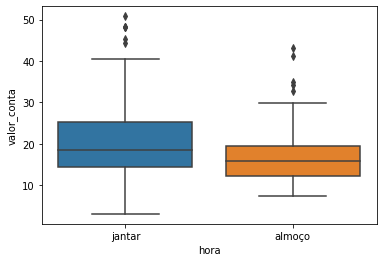

In [105]:
sns.boxplot(x = 'hora', y = 'valor_conta', data = gorjetas)

In [106]:
almoço = gorjetas.query("hora == 'almoço'").valor_conta

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


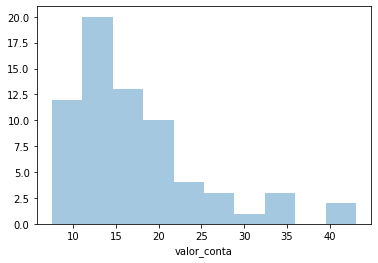

In [109]:
sns.distplot(almoço, kde = False)

In [110]:
jantar = gorjetas.query("hora == 'jantar'").valor_conta

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


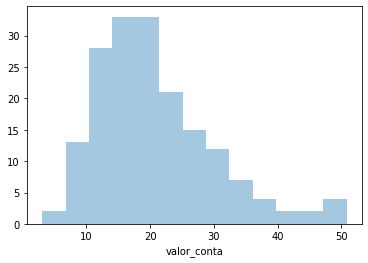

In [111]:
sns.distplot(jantar, kde = False)

In [113]:
gorjetas.groupby(['hora']).mean()[['valor_conta', 'gorjeta', 'porcentagem']]

,valor_conta,gorjeta,porcentagem
hora,,,
almoço,17.168676,2.728088,0.163971
jantar,20.797159,3.102670,0.159773


## Teste de Hipótese

In [116]:
r3 = ranksums(jantar, almoço)

In [118]:
print(f"Pvalue = {r3.pvalue}")

Pvalue = 0.0011791039723641672


In [121]:
porcentagem_almoço = gorjetas.query("hora == 'almoço'").porcentagem

In [122]:
porcentagem_jantar = gorjetas.query("hora == 'jantar'").porcentagem

In [124]:
r4 = ranksums(porcentagem_almoço, porcentagem_jantar)

In [127]:
print(f"Pvalue: {r4.pvalue}")

Pvalue: 0.2602493995587126
